## Final Project Submission

Please fill out:
* Student name: Lucy W. Waruguru
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Lucille Kaleha, Samuel Karu, Nikita Njoroge
* Blog post URL:


# Beginning
The first step is importing all the required libraries to execute the code. The next step involves connecting to the SQL, so that we can get access to the data and information we need to load.

In [42]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3

#connect to sql
conn = sqlite3.connect('zippedData/im.db')

def sqldata(query):
    return pd.read_sql(query, conn)


In [43]:
#Viewing available tables in the im.db database
im_db = pd.read_sql('SELECT * FROM sqlite_master;', conn)
im_db.head()

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."


## Loading Data from the tables
After viewing the available tables in the database, the next step involves loading and opening the tables. That helps to identify the data needed, and tables that can be dropped, if they don't carry data or information needed, the tables are deleted (not from the database) on the noteboook. After loading and checking the tables, the movie_basics table and ratings were kept, and below is the type of data they carry.

In [44]:
#Checking data available in the movie_basics dataframe
movie_basics = pd.read_sql('SELECT* FROM movie_basics;', conn)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [45]:
#Checking data available in the movie_ratings dataframe
movie_ratings = pd.read_sql('SELECT* FROM movie_ratings;', conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


## Loading Data from the tables 2
There are other tables with more information. Just like in the im_db tables, to help decide on what tables are needed and what data is deede, the tables are loaded, then required tables are kept, and the rest deleted.

In [46]:
#Checking data available in the movie_gross dataframe
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


# Data cleaning 
In the next steps, we are loooking for inconsistencies and missing values from our dataframes. The inconsistencies and missing values are sorted by either dropping entire rows and, or columns, replacing the values (either with the mean or median of the available values) or keeping the data as it is and orking with that.
some of the methods that have been used to check the data for cleaning:
.shape - shows the total number of rows and columns;
.info() - shows the data's datatype, and shows the total number of available values for each column;
.describe() - shows key statistical measures of the data; count, mean, standard deviation, minimum count, maximum count, and quartile percentiles.
.isna() .sum() - shows the total number of missing values for each column.
.duplicated .sum() - checks for duplicate data in the dataframe

### Movie_basics cleaning

In [47]:
movie_basics.shape

(146144, 6)

In [48]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [49]:
movie_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [50]:
movie_basics_null_count = movie_basics.isna() .sum()
movie_basics_null_count

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

#### Percentage of missing values
To see the extent of the missing values, the best thing to do is find the percentages of the null counts, which helps make a decision on the action to take for the missing values. For the movie_basics, percentages of the original_title and genres are neglible, but the runtime_minutes has a huge percentage of null values.

In [51]:
movie_basics_null_count_percentage = (movie_basics_null_count/len(movie_basics))*100
movie_basics_null_count_percentage

movie_id            0.000000
primary_title       0.000000
original_title      0.014369
start_year          0.000000
runtime_minutes    21.717621
genres              3.700460
dtype: float64

#### Cause of action
For the genres and original_title, it is easier to delete the rows with missing values. However, for the runtime_minutes column, it's better to calculate the mean or median of the data, and then using the result to replace all the null values. In this case, after checking for the mean and median and seeing there is only a slight difference between them, settled on using the mean as a replacement of the null values.

In [52]:
# Dropping rows with missing values in either genres or original_title.
movie_basics.dropna(subset=['genres', 'original_title'], inplace=True)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


#### Checking for duplicate values
Duplicate values can greatly affect the analysis of data, and it is important to confirm that there are no duplicates. Duplicates can easily affect the statistical measures of data.

In [53]:
movie_basics.duplicated() .sum()

0

In [54]:
#Replacing all the null values in runtime_minutes with the mean of runtime_minutes.
movie_basics['runtime_minutes'].fillna(movie_basics['runtime_minutes'].mean(), inplace=True)

In [55]:
#Checking the new simensions of the table.
movie_basics.shape

(140734, 6)

### Movie_ratings cleaning

In [56]:
movie_ratings.shape

(73856, 3)

In [57]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [58]:
movie_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [59]:
movie_ratings_null_count = movie_ratings.isna().sum()
movie_ratings_null_count

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [60]:
movie_ratings.duplicated() .sum()

0

In [61]:
movie_ratings.value_counts()

movie_id   averagerating  numvotes
tt9916160  6.5            11          1
tt2413182  9.2            13          1
tt2418372  5.9            866         1
tt2418384  7.0            13          1
tt2418440  6.3            4551        1
                                     ..
tt4861720  5.2            62          1
tt4861730  6.1            331         1
tt4862056  8.3            14          1
tt4862190  8.2            117         1
tt0063540  7.0            77          1
Length: 73856, dtype: int64

#### Movie_ratings observations
For this dataframe, there are no null values, and duplicates.

### bom.movie_gross (movie_gross) cleaning

In [62]:
movie_gross.shape

(3387, 5)

In [63]:
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [64]:
movie_gross_null_count = movie_gross.isna().sum()
movie_gross_null_count

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [65]:
movie_gross = movie_gross.dropna()
movie_gross.shape

(2007, 5)

#### Movie_ratings observations
It is easier to drop all the none available values, for easy analysis.

# Data Analysis and Visualization
The first step involves joining the movie_basics and movie_ratings dataframes for comparisons and plotting.

In [66]:
movie_basic_ratings = sqldata('''SELECT * FROM  movie_basics
                                LEFT JOIN  movie_ratings
                                USING (movie_id) ''') 
movie_basic_ratings

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,NaN,NaN


In [67]:
#Creating a new column, all_genres, which gives the movie genres a list form
genres_list = sorted(set(
    genre.strip() for genres in movie_basic_ratings['genres'] if genres is not None for genre in genres.split(',')
))
movie_basic_ratings['all_genres'] = movie_basic_ratings['genres'].apply(lambda x: [genre.strip() for genre in x.split(',')] if x else [])
movie_basic_ratings


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,all_genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,"[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,"[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0,"[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,"[Comedy, Drama, Fantasy]"
...,...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN,[Drama]
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN,[Documentary]
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN,[Comedy]
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,NaN,NaN,[]


In [68]:
#For easier comparison of columns, its easier to separate columns from the rest of the dataset using Dataframe indexing.
select_columns = ['runtime_minutes', 'genres']

outcome= movie_basic_ratings[select_columns]
outcome

,runtime_minutes,genres
0,175.0,"Action,Crime,Drama"
1,114.0,"Biography,Drama"
2,122.0,Drama
3,NaN,"Comedy,Drama"
4,80.0,"Comedy,Drama,Fantasy"
...,...,...
146139,123.0,Drama
146140,NaN,Documentary
146141,NaN,Comedy
146142,116.0,None


In [69]:
#We split the genres, so that it is possible to iterate the runtime_minutes over each genre in the list
genre_list = [{'runtime_minutes': row['runtime_minutes'], 'genres': genre.strip()}
              for index, row in movie_basic_ratings.iterrows()
              for genre in (row['genres'] or '').split(',') if genre.strip()]

runtime_genre = pd.DataFrame(genre_list)
runtime_genre

,runtime_minutes,genres
0,175.0,Action
1,175.0,Crime
2,175.0,Drama
3,114.0,Biography
4,114.0,Drama
...,...,...
229545,NaN,War
229546,123.0,Drama
229547,NaN,Documentary
229548,NaN,Comedy


In [70]:
#After splitting the genres, it becomes easy to rate the genre popularity, by getting the total counts of each genre.
genre_popularity = runtime_genre['genres'].value_counts()
genre_popularity

Documentary    51640
Drama          49883
Comedy         25312
Thriller       11883
Horror         10805
Action         10335
Romance         9372
Biography       8722
Crime           6753
Adventure       6465
Family          6227
History         6225
Mystery         4659
Music           4314
Fantasy         3516
Sci-Fi          3365
Animation       2799
Sport           2234
News            1551
Musical         1430
War             1405
Western          467
Reality-TV        98
Talk-Show         50
Adult             25
Short             11
Game-Show          4
Name: genres, dtype: int64

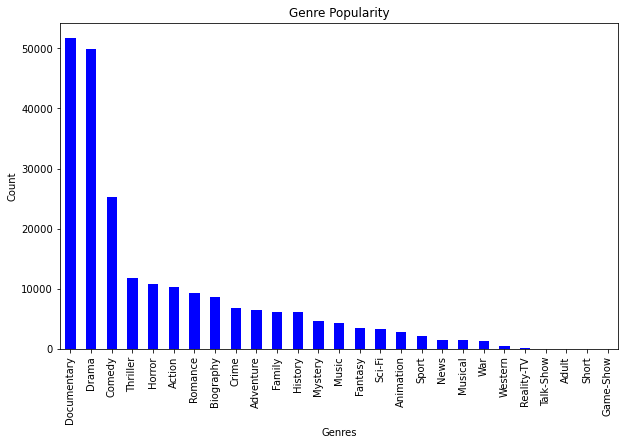

In [71]:
# Plot a bar graph

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data on the specified axis as a horizontal bar plot
genre_popularity.plot(kind ='bar', color = 'blue')

# Set the title, labels, and other formatting
ax.set_title('Genre Popularity')
ax.set_xlabel('Genres')
ax.set_ylabel('Count')

# Display the plot
plt.show()

In [72]:
#For easier comparison of columns, its easier to separate columns from the rest of the dataset using Dataframe indexing.
select_columns = ['all_genres', 'averagerating']

outcome_2 = movie_basic_ratings[select_columns]
outcome_2.dropna(inplace=True)
outcome_2

<ipython-input-72-5e8db0664f8f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outcome_2.dropna(inplace=True)


,all_genres,averagerating
0,"[Action, Crime, Drama]",7.0
1,"[Biography, Drama]",7.2
2,[Drama],6.9
3,"[Comedy, Drama]",6.1
4,"[Comedy, Drama, Fantasy]",6.5
...,...,...
146115,[Documentary],6.2
146122,"[Drama, Family]",8.7
146125,[Documentary],8.5
146129,[],6.6


In [73]:
#Iterating the runtime_minutes over each genre in the list
split_genres = []
for index,record in outcome_2.iterrows():
    genre_list = record['all_genres']
    if len(genre_list) >1:
        for individual in genre_list:
            split_genres.append({individual:outcome_2.at[index,'averagerating']})
    elif len(genre_list) ==1:
        split_genres.append({genre_list[0]:outcome_2.at[index,'averagerating']})

split_genres

[{'Action': 7.0},
 {'Crime': 7.0},
 {'Drama': 7.0},
 {'Biography': 7.2},
 {'Drama': 7.2},
 {'Drama': 6.9},
 {'Comedy': 6.1},
 {'Drama': 6.1},
 {'Comedy': 6.5},
 {'Drama': 6.5},
 {'Fantasy': 6.5},
 {'Horror': 4.1},
 {'Thriller': 4.1},
 {'Adventure': 8.1},
 {'Animation': 8.1},
 {'Comedy': 8.1},
 {'Drama': 6.8},
 {'History': 4.6},
 {'Documentary': 7.6},
 {'Drama': 6.9},
 {'Documentary': 7.5},
 {'Animation': 7.8},
 {'Drama': 7.8},
 {'History': 7.8},
 {'Drama': 4.0},
 {'Drama': 8.8},
 {'Drama': 4.0},
 {'Mystery': 4.0},
 {'Action': 1.9},
 {'Animation': 1.9},
 {'Comedy': 1.9},
 {'Crime': 6.7},
 {'Drama': 6.7},
 {'Biography': 5.9},
 {'Comedy': 5.9},
 {'Drama': 5.9},
 {'Documentary': 7.8},
 {'Drama': 7.1},
 {'Action': 7.4},
 {'Drama': 7.4},
 {'Documentary': 7.0},
 {'History': 7.0},
 {'Sci-Fi': 6.6},
 {'Comedy': 3.9},
 {'Documentary': 7.4},
 {'Thriller': 6.6},
 {'Crime': 6.7},
 {'Drama': 6.7},
 {'Adventure': 5.1},
 {'Animation': 5.1},
 {'Sci-Fi': 5.1},
 {'Action': 7.1},
 {'Crime': 7.1},
 {'Drama

In [74]:
# Returning the slip_genre into a dataframe
index_list = [key for data in split_genres for key in data.keys()]
values_list =[value for data in split_genres for value in data.values()]
new_genre = pd.Series(data = values_list, index = index_list)

new_genre

Action         7.0
Crime          7.0
Drama          7.0
Biography      7.2
Drama          7.2
              ... 
Documentary    6.2
Drama          8.7
Family         8.7
Documentary    8.5
Documentary    6.5
Length: 128490, dtype: float64

In [75]:
#Iterate through the genres to get the mean of each genre
mean_count = new_genre.groupby(new_genre.index).mean()
sorted_mean_count = mean_count.sort_values(ascending=False)
sorted_mean_count


Short          8.800000
Documentary    7.332090
Game-Show      7.300000
News           7.271330
Biography      7.162274
Music          7.091972
History        7.040956
Sport          6.961493
War            6.584291
Reality-TV     6.500000
Musical        6.498336
Drama          6.401559
Family         6.394725
Animation      6.248308
Adventure      6.196201
Romance        6.146608
Crime          6.115441
Comedy         6.002689
Mystery        5.920401
Fantasy        5.919473
Western        5.868214
Action         5.810361
Thriller       5.639114
Sci-Fi         5.489755
Horror         5.003440
Adult          3.766667
dtype: float64

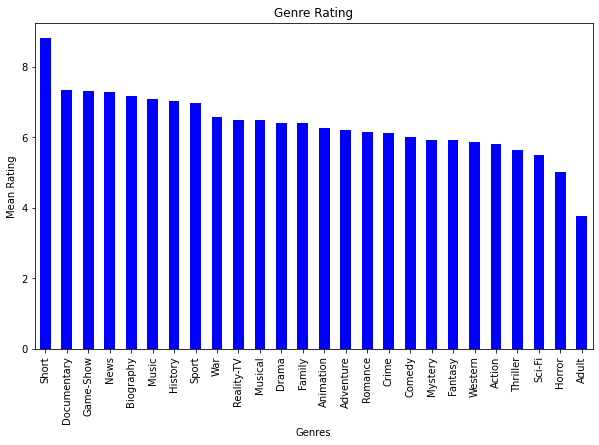

In [76]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data on the specified axis as a horizontal bar plot
sorted_mean_count.plot(kind = "bar", color = "blue")

# Set the title, labels, and other formatting
ax.set_title("Genre Rating")
ax.set_xlabel("Genres")
ax.set_ylabel("Mean Rating")

# Display the plot
plt.show()

In [77]:
#Make a list containing all the unique genres
list(new_genre.index.unique())

['Action',
 'Crime',
 'Drama',
 'Biography',
 'Comedy',
 'Fantasy',
 'Horror',
 'Thriller',
 'Adventure',
 'Animation',
 'History',
 'Documentary',
 'Mystery',
 'Sci-Fi',
 'Family',
 'Romance',
 'War',
 'Music',
 'Sport',
 'Western',
 'Musical',
 'News',
 'Reality-TV',
 'Game-Show',
 'Adult',
 'Short']

In [78]:
#Change the 'foreign_gross' to a numeric form to enable mathematical computations
movie_gross['foreign_gross'] = pd.to_numeric(movie_gross['foreign_gross'], errors = 'coerce')

#Replace all the null values in the foreign_gross column with 0
movie_gross['foreign_gross'].replace(np.nan, 0, inplace=True)
movie_gross['total_gross'] = movie_gross[['foreign_gross', 'domestic_gross']].sum(axis=1)
#Creating a new column that gives a summation of the domestic and foreign gross.


movie_gross

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018,1.501400e+06
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,9.540000e+05
3309,Time Freak,Grindstone,10000.0,256000.0,2018,2.660000e+05
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018,9.840000e+04
